In [18]:
import numpy as np
import pickle
import itertools
import pandas as pd
import matplotlib.pyplot as plt

In [103]:
df_train = pd.read_csv("data/diabetes/diab_train.csv")
header = df_train.keys()
df_train = np.asarray(df_train)
df_val = np.asarray(pd.read_csv("data/diabetes/diab_validation.csv"))
df_test = np.asarray(pd.read_csv("data/diabetes/diab_test.csv"))

In [104]:
X = np.hstack([df_train[:,:-4], df_train[:,-3:]])
X_val = np.hstack([df_val[:,:-4], df_val[:,-3:]])
X_test = np.hstack([df_test[:,:-4], df_test[:,-3:]])
Y = df_train[:,-4].reshape(-1).astype(int)
Y_val = df_val[:,-4].reshape(-1).astype(int)
Y_test = df_test[:,-4].reshape(-1).astype(int)

In [105]:
X_all = np.vstack([X, X_val, X_test])
Y_all = np.hstack([Y, Y_val, Y_test])
XY = np.vstack([np.hstack([X, Y.reshape(-1, 1)]), np.hstack([X_val, Y_val.reshape(-1, 1)])])

# Inspect dataset
10'000 samples of 51 features, 6'000 for training, 2'000 validation and 2'000 testing.<br>
We can drop the first column, because all id's are unique.

In [28]:
print("Percentage of not readmitted vs. readmitted:", np.bincount(Y) / len(Y) * 100)

Percentage of not readmitted vs. readmitted: [60.35 39.65]


In [185]:
def inspect_feature(ix):
    happy = []
    readmitted = []
    labels = []
    for e in set(XY[:,ix]):
        t = XY[XY[:,ix] == e][:,-1]
        if len(t) > 0:
            labels.append(e)
            happy.append(len(t[t == 0]) / len(t) * 100)
            readmitted.append(len(t[t == 1]) / len(t) * 100)
    
    labels = np.asarray(labels)
    sort = np.argsort(labels)
    labels = labels[sort]
    happy = np.round(np.asarray(happy)[sort], 2)
    readmitted = np.round(np.asarray(readmitted)[sort], 2)
    
    x = np.arange(len(labels))  # the label locations
    width = 0.35  # the width of the bars

    fig, ax = plt.subplots(figsize=(12,6))
    rects1 = ax.bar(x - width/2, happy, width, label='Not readmitted')
    rects2 = ax.bar(x + width/2, readmitted, width, label='Readmitted')

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_title(header[ix])
    ax.set_ylabel('%')
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    ax.legend()
    
    def autolabel(rects):
        """Attach a text label above each bar in *rects*, displaying its height."""
        for rect in rects:
            height = rect.get_height()
            ax.annotate('{}'.format(height),
                        xy=(rect.get_x() + rect.get_width() / 2, height),
                        xytext=(0, 3),  # 3 points vertical offset
                        textcoords="offset points",
                        ha='center', va='bottom')


    autolabel(rects1)
    autolabel(rects2)
    plt.show()

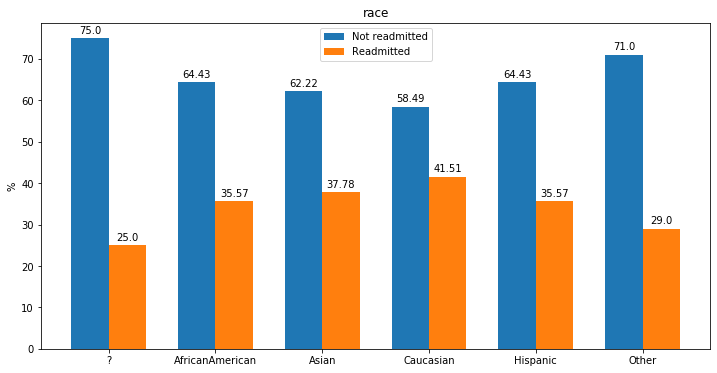

In [186]:
inspect_feature(1)

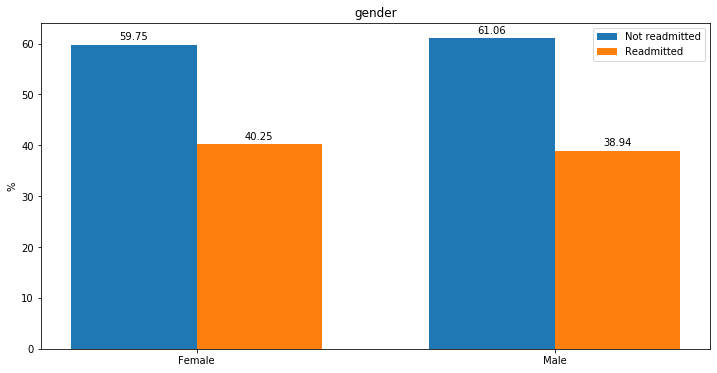

In [187]:
inspect_feature(2)

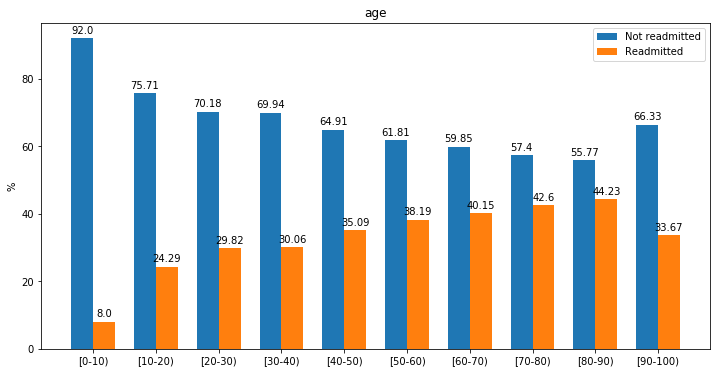

In [188]:
inspect_feature(3)

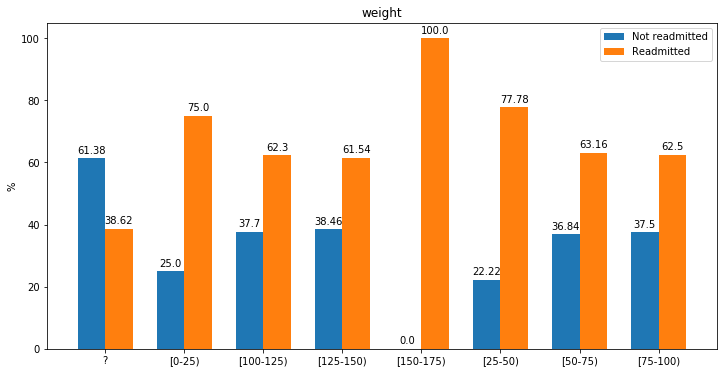

In [189]:
inspect_feature(4)

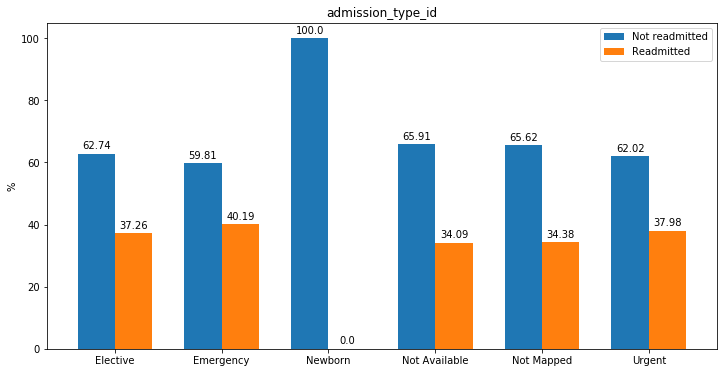

In [190]:
inspect_feature(5)

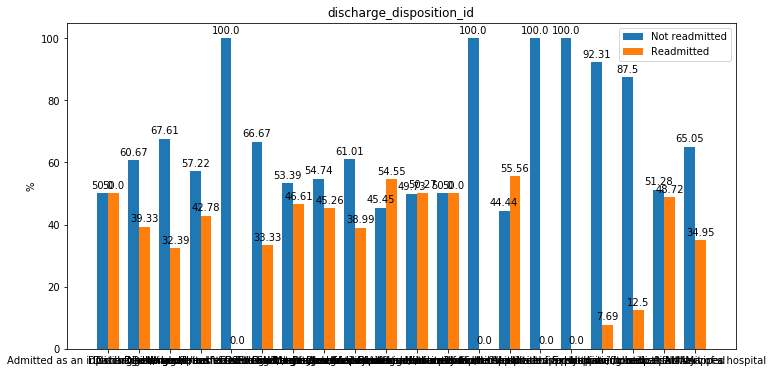

In [191]:
inspect_feature(6)

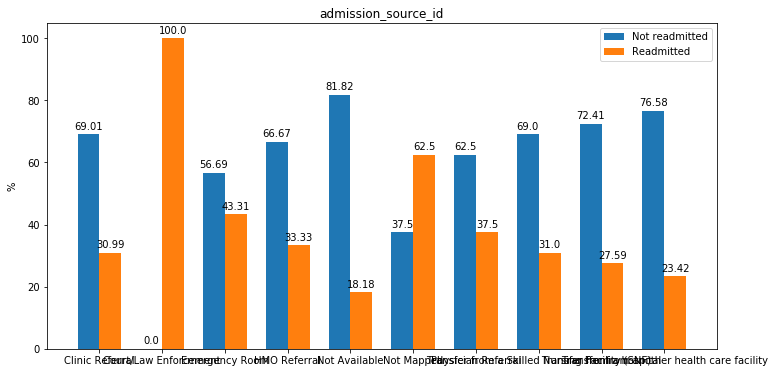

In [192]:
inspect_feature(7)

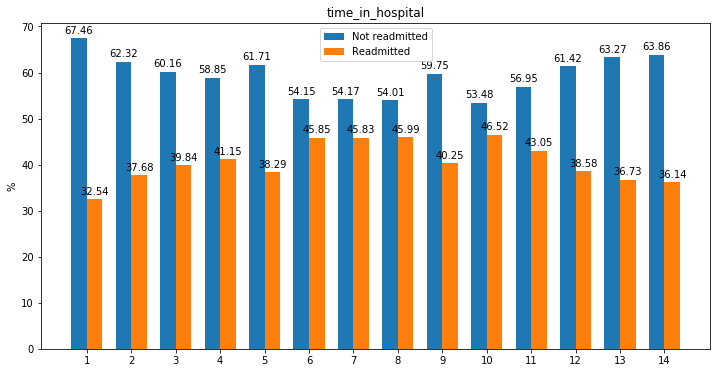

In [193]:
inspect_feature(8)

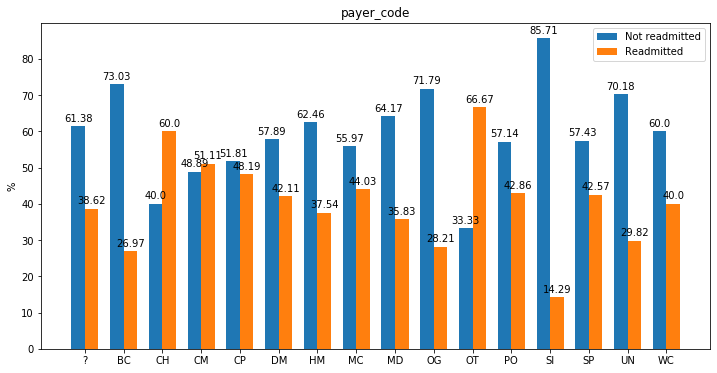

In [194]:
inspect_feature(9)

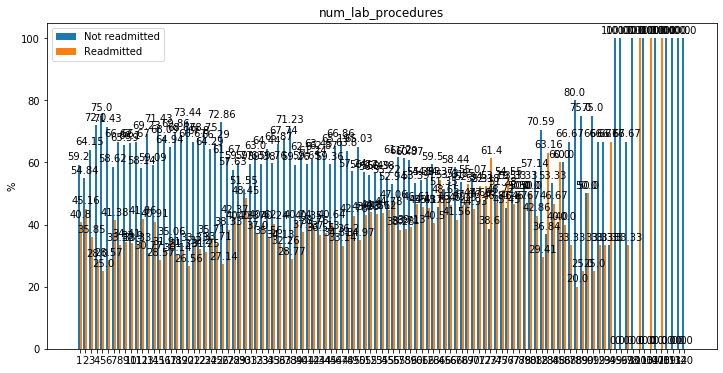

In [196]:
inspect_feature(11)

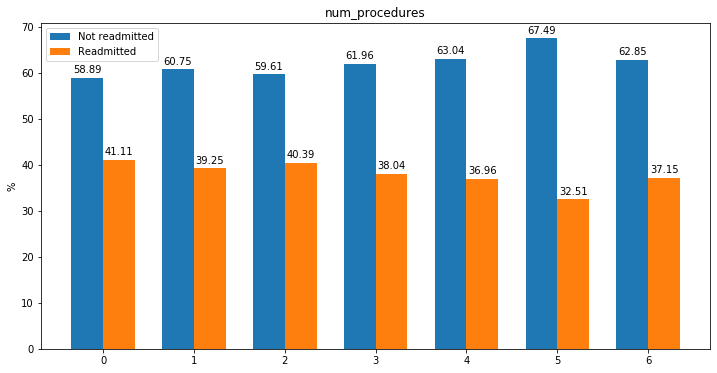

In [197]:
inspect_feature(12)

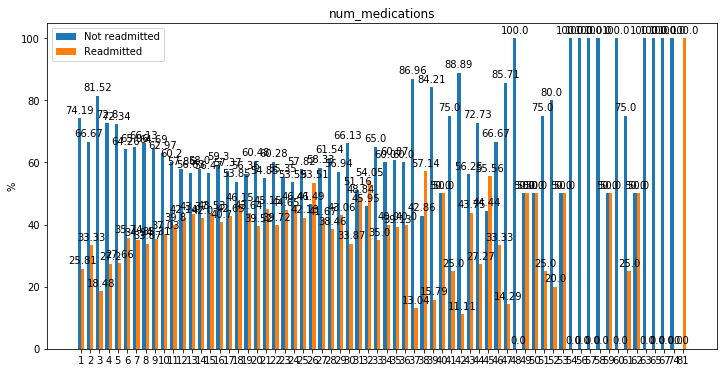

In [198]:
inspect_feature(13)

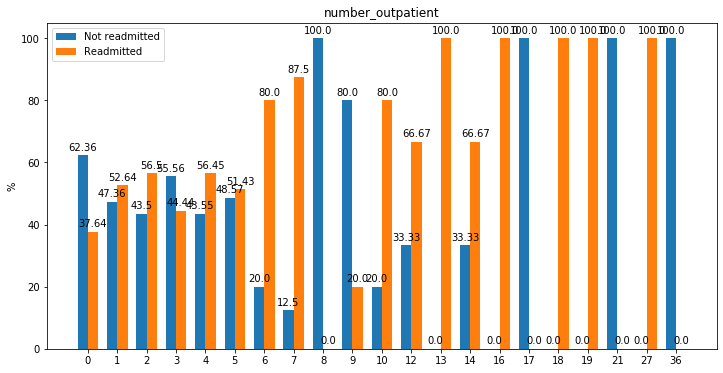

In [199]:
inspect_feature(14)

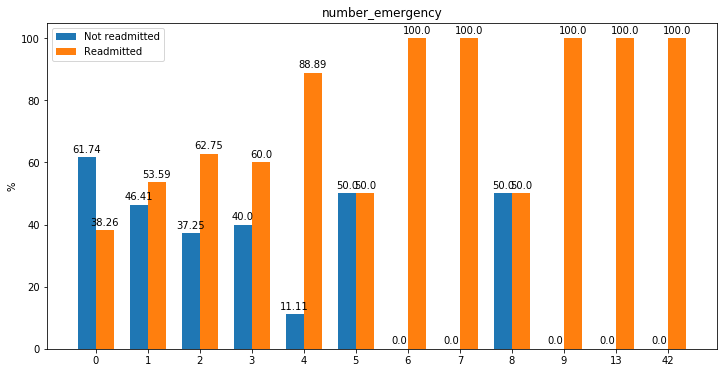

In [200]:
inspect_feature(15)

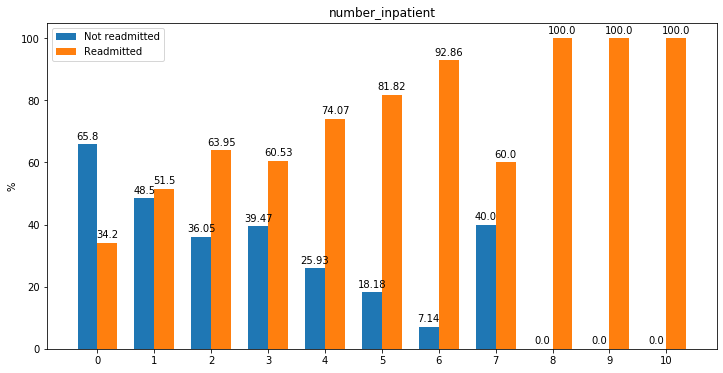

In [201]:
inspect_feature(16)

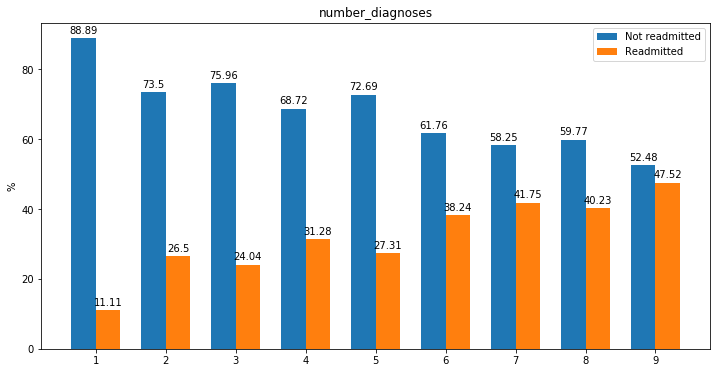

In [203]:
inspect_feature(20)

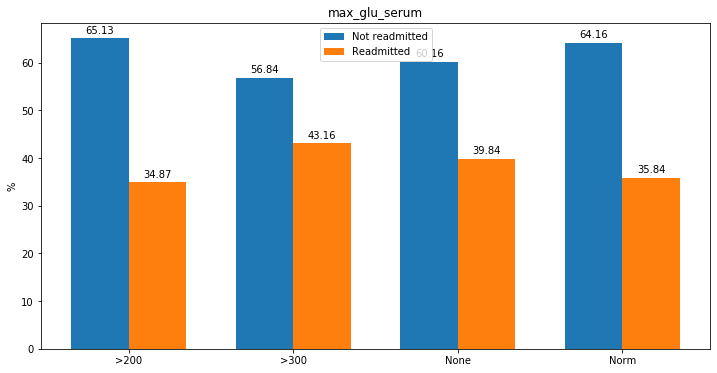

In [204]:
inspect_feature(21)

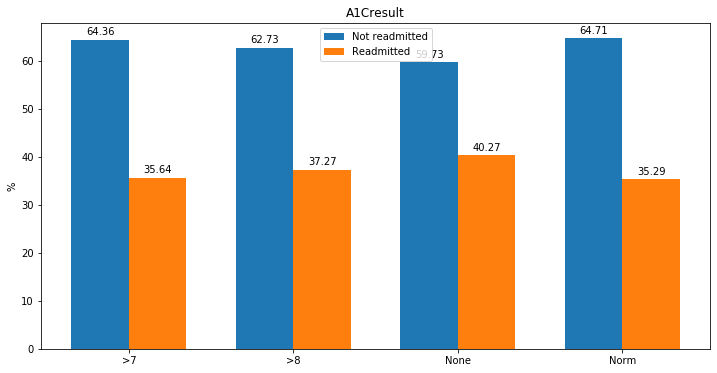

In [206]:
inspect_feature(22)

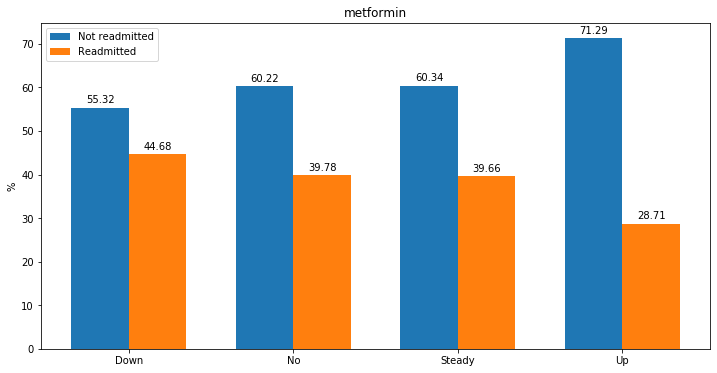

In [207]:
inspect_feature(23)

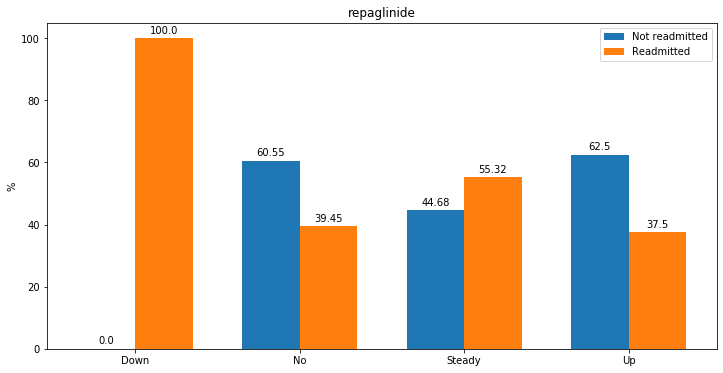

In [208]:
inspect_feature(24)

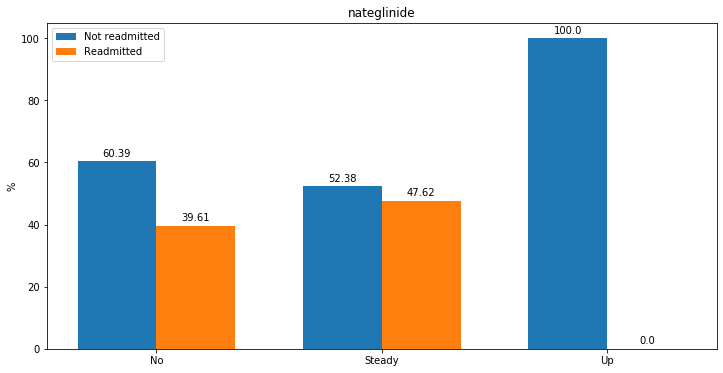

In [209]:
inspect_feature(25)

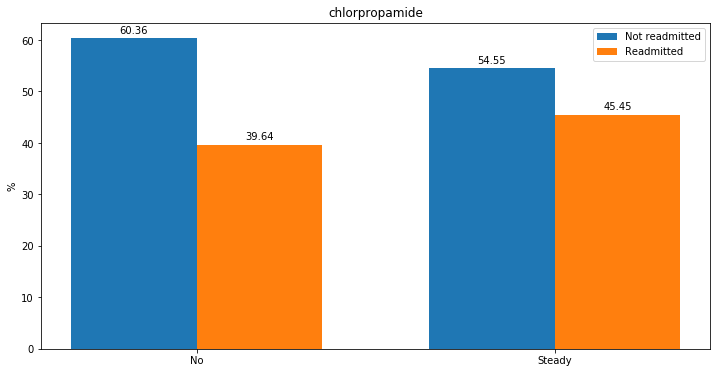

In [210]:
inspect_feature(26)

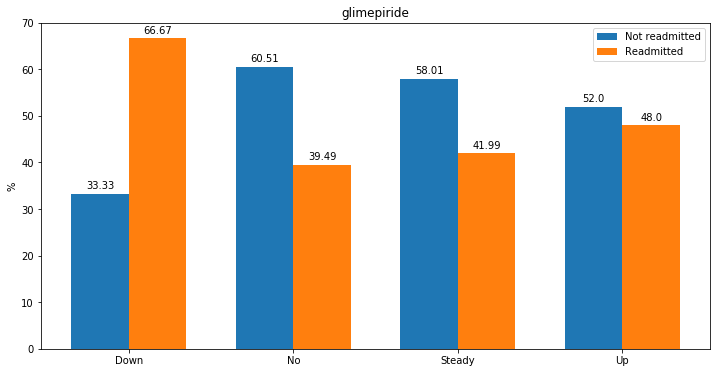

In [211]:
inspect_feature(27)